In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [26]:
# Membaca data dari file csv
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [27]:
#menampilkan informasi tentang dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


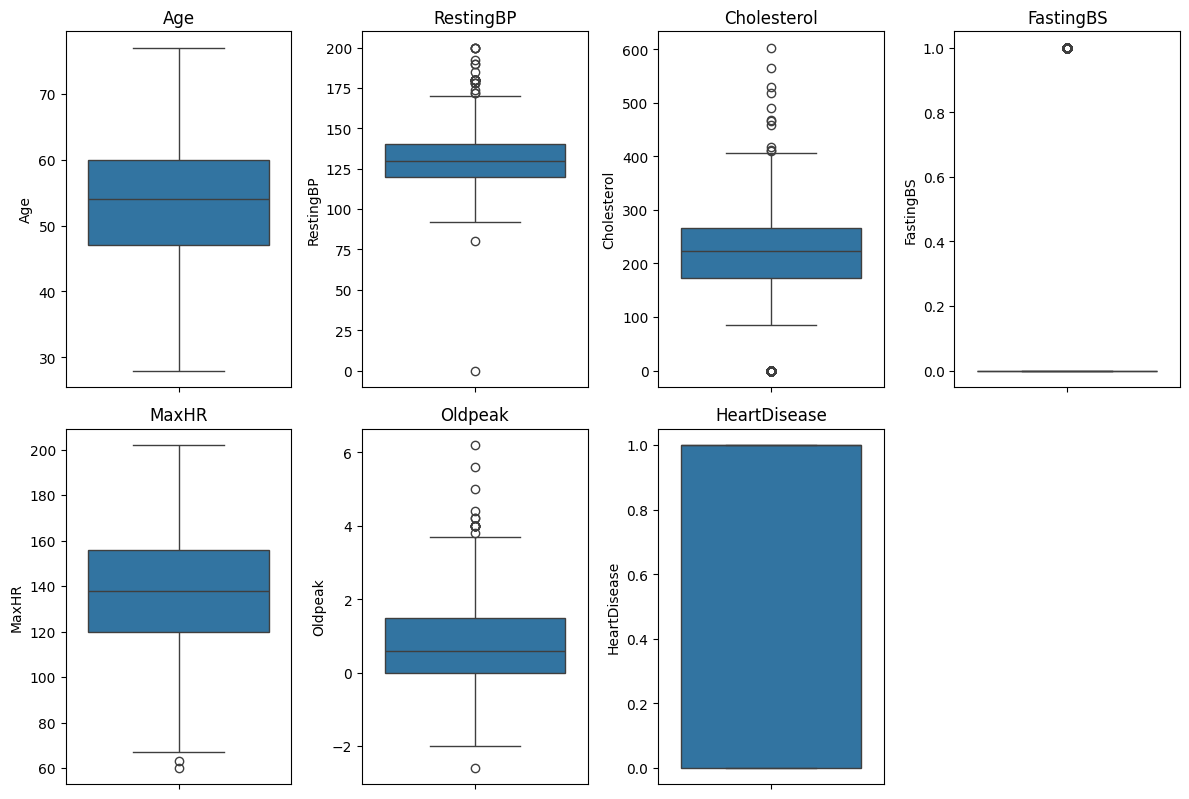

In [29]:
# Mengecek jumlah outlier menggunakan boxplot
num_rows = 4
num_cols = 4
plt.figure(figsize=(12, 16))  
kolom_numerik = df.select_dtypes(include=['number']).columns
for i, kolom in enumerate(kolom_numerik):
    if i < num_rows * num_cols:
        plt.subplot(num_rows, num_cols, i + 1)
        sns.boxplot(y=df[kolom])
        plt.title(kolom)
plt.tight_layout()
plt.show()

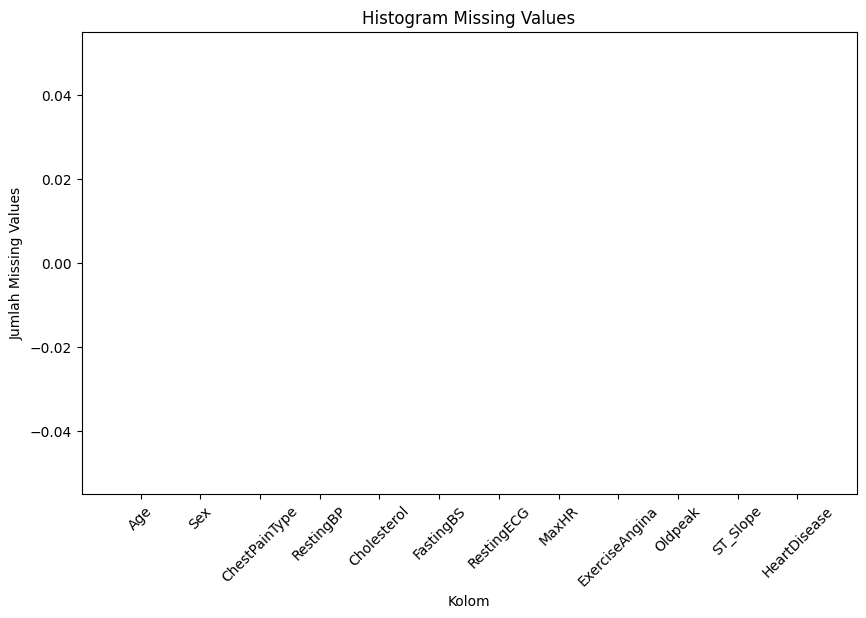

In [30]:
# Mengecek jumlah nilai yang hilang dalam setiap kolom
missing_values = df.isnull().sum()

# Membuat histogram untuk menampilkan jumlah nilai yang hilang
plt.figure(figsize=(10, 6))
plt.bar(missing_values.index, missing_values.values, color='lightcoral')
plt.xlabel('Kolom')
plt.ylabel('Jumlah Missing Values')
plt.title('Histogram Missing Values')
plt.xticks(rotation=45)
plt.show()

In [31]:
# Hitung dan tampilkan mean, median, mode, standar deviasi, variansi, skewness, dan kurtosis untuk kolom numerik
print("\nStatistik Deskriptif:")
# Pilih hanya kolom numerik
numeric_cols = df.select_dtypes(include='number')

# Menghitung statistik deskriptif
desc = numeric_cols.describe().transpose()
desc['mean'] = numeric_cols.mean()
desc['median'] = numeric_cols.median()
desc['mode'] = numeric_cols.mode().iloc[0]

print(desc)



Statistik Deskriptif:
              count        mean         std   min     25%    50%    75%  \
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0   
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0   
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0   
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0   
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5   
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0   

                max  median   mode  
Age            77.0    54.0   54.0  
RestingBP     200.0   130.0  120.0  
Cholesterol   603.0   223.0    0.0  
FastingBS       1.0     0.0    0.0  
MaxHR         202.0   138.0  150.0  
Oldpeak         6.2     0.6    0.0  
HeartDisease    1.0     1.0    1.0  


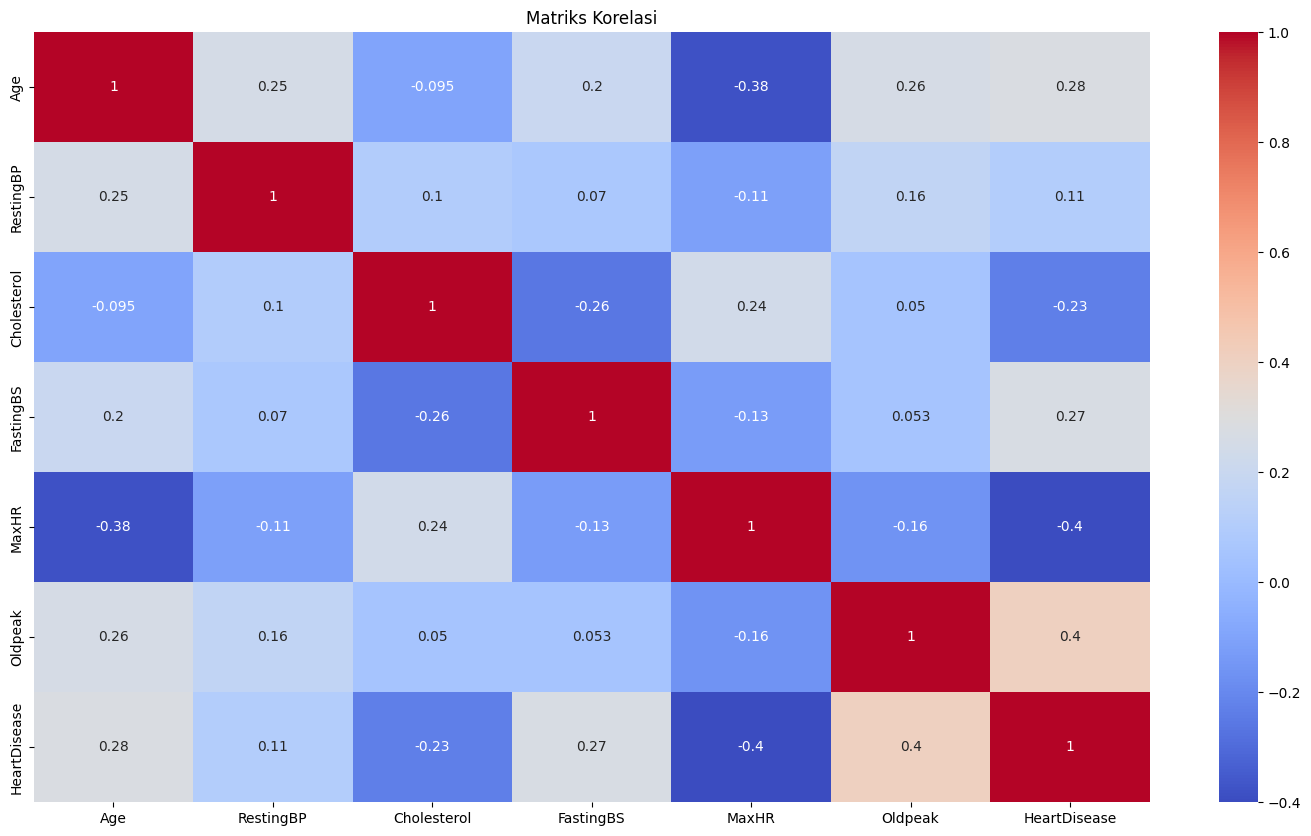

In [32]:
# Melihat korelasi antar variabel
kolom_numerik = df.select_dtypes(include=['number']).columns
korelasi = df[kolom_numerik].corr()
# Membuat heatmap matriks korelasi
plt.figure(figsize=(18, 10))
sns.heatmap(korelasi, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()


Histogram untuk Variabel Numerik:


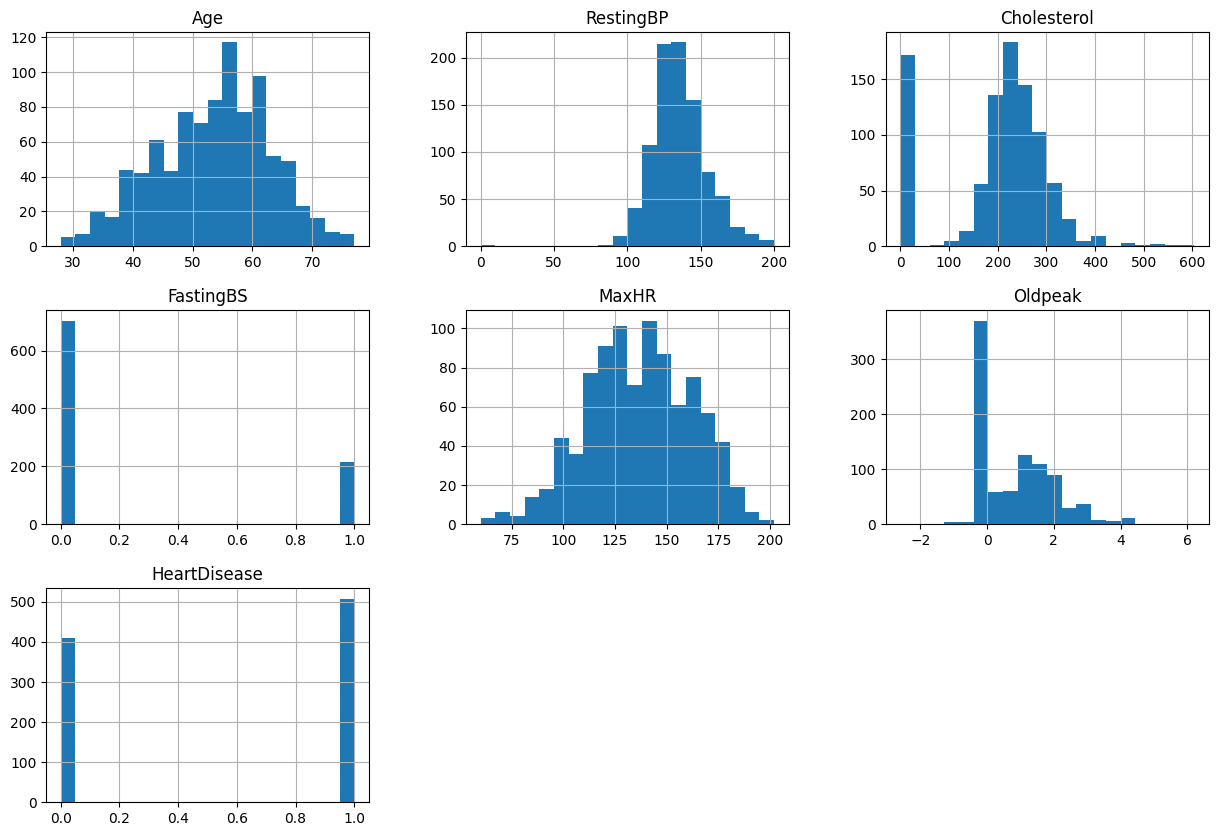

In [33]:
# histogram untuk setiap variabel numerik
print("\nHistogram untuk Variabel Numerik:")
df.hist(figsize=(15, 10), bins=20)
plt.show()



Box Plot untuk Variabel Numerik:


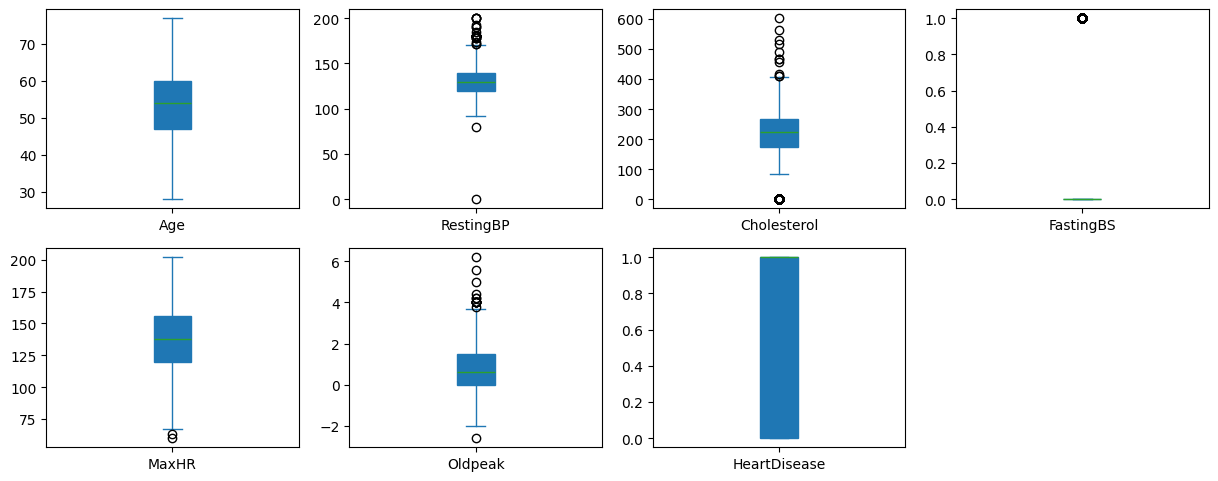

In [34]:
# box plot untuk setiap variabel numerik
print("\nBox Plot untuk Variabel Numerik:")
df.plot(kind='box', subplots=True, layout=(5,4), figsize=(15,15), patch_artist=True)
plt.show()



Scatter Plot untuk Variabel dengan Korelasi Tinggi:


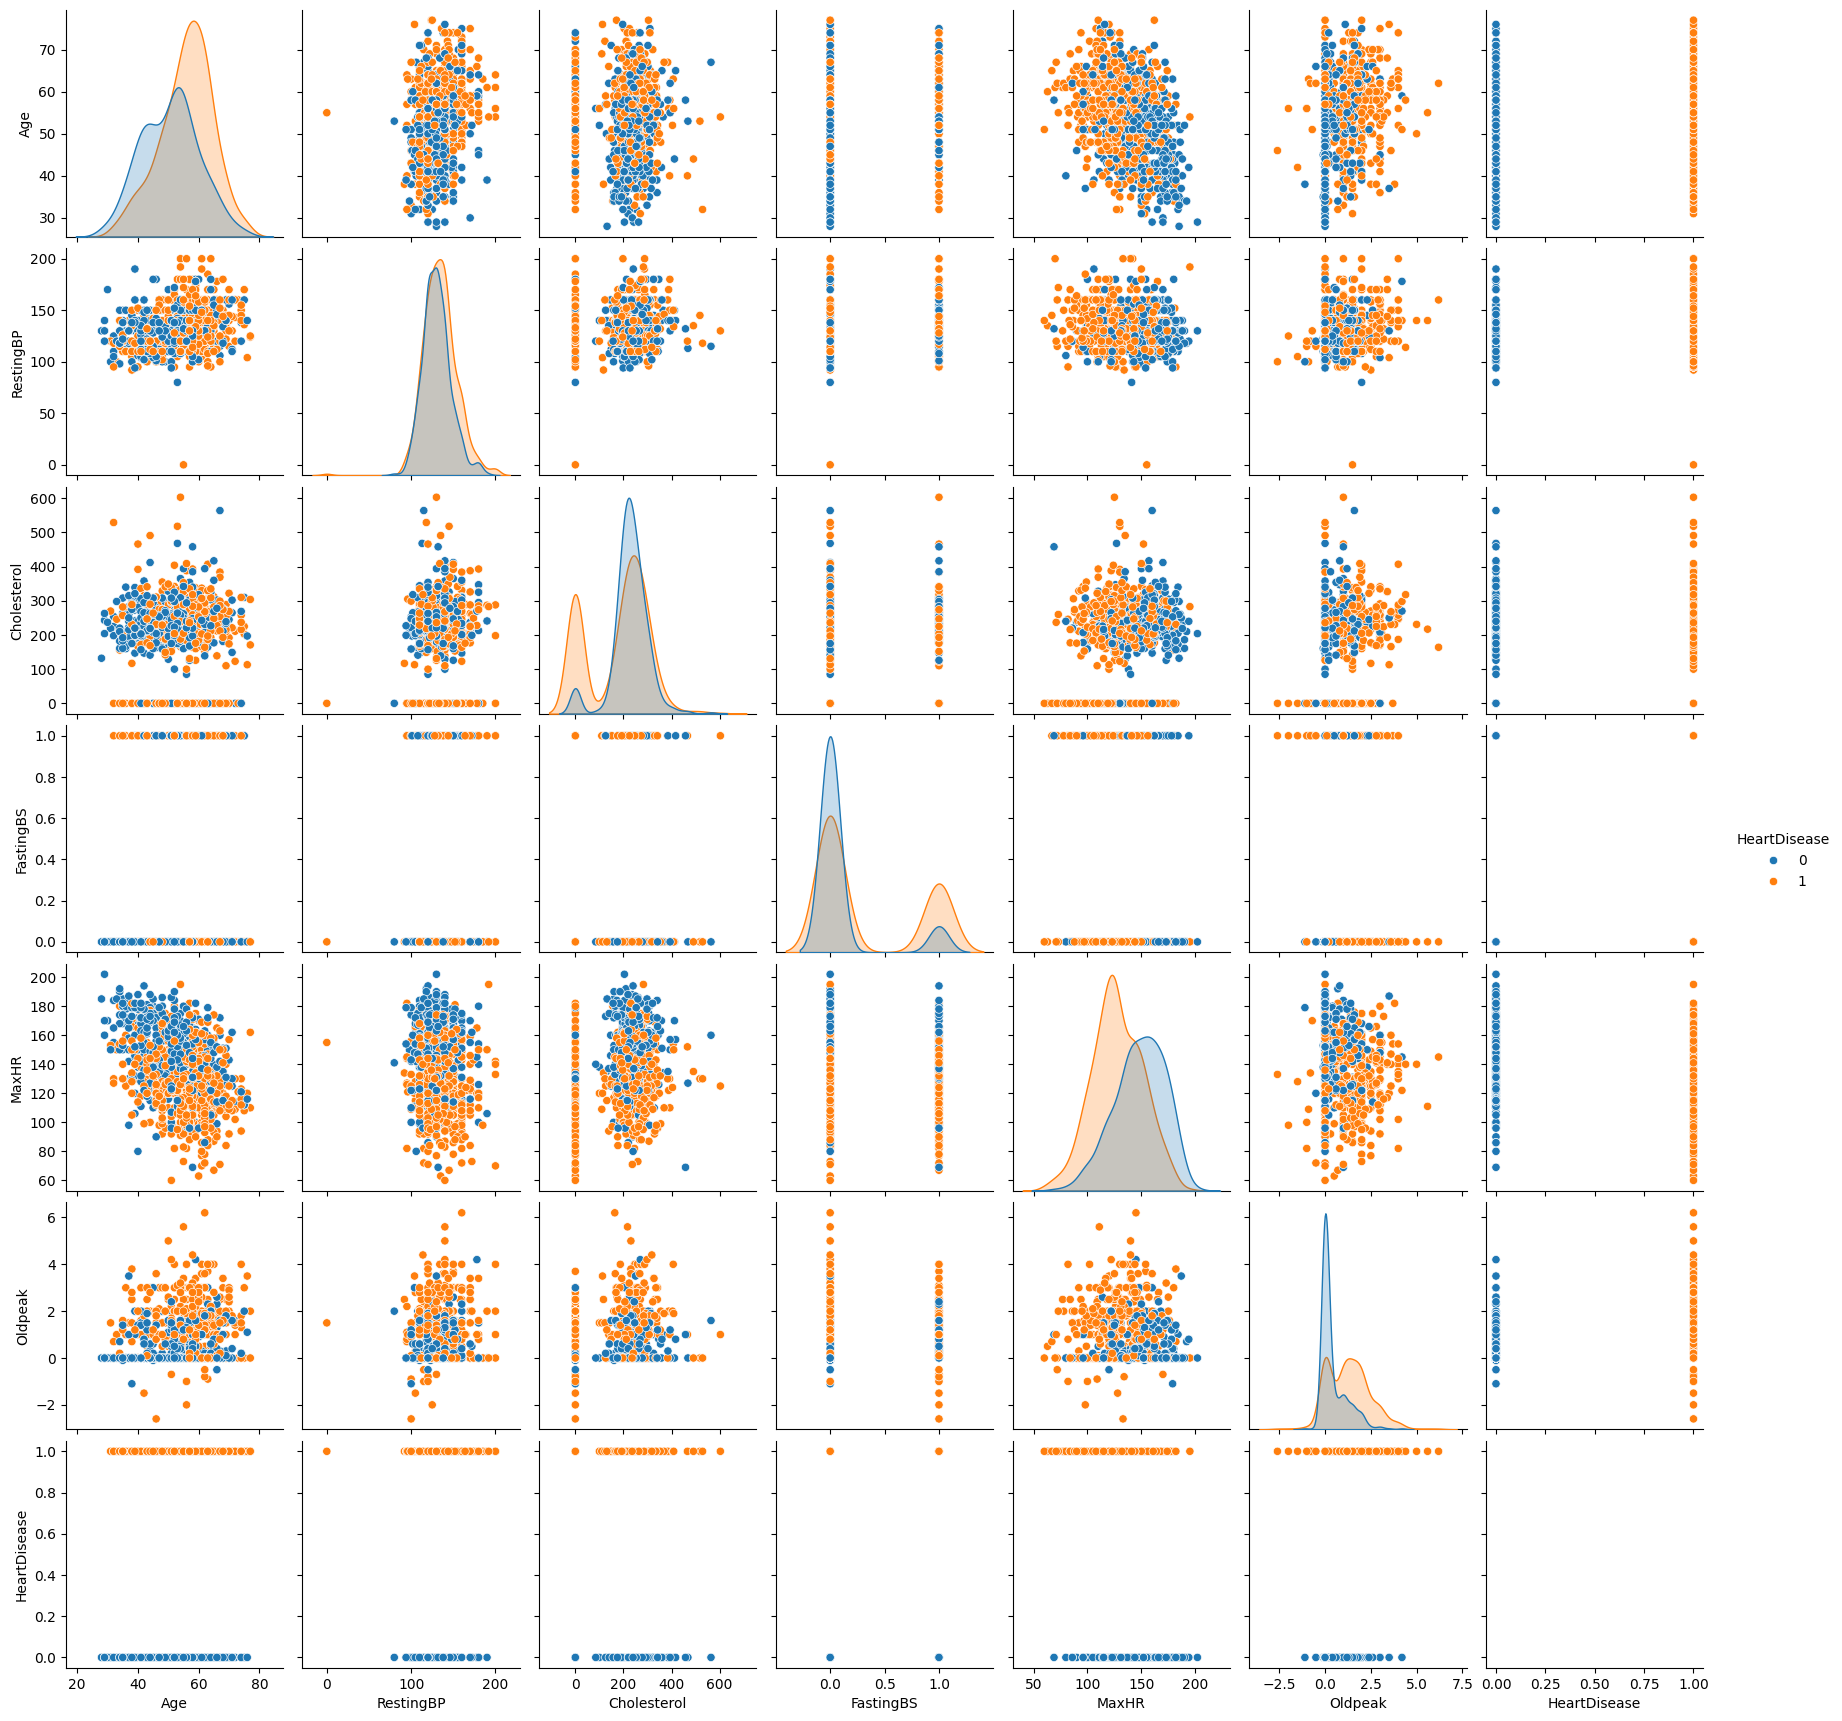

In [35]:
# scatter plot untuk pasangan variabel yang memiliki korelasi tinggi
print("\nScatter Plot untuk Variabel dengan Korelasi Tinggi:")
sns.pairplot(df, vars=['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','HeartDisease'], hue='HeartDisease')
plt.show()



In [ ]:
Matriks korelasi menunjukkan bahwa detak jantung maksimum (Max heart rate) memiliki hubungan positif yang kuat dengan pencapaian target, sedangkan peningkatan oldpeak justru memiliki korelasi negatif terhadap target tersebut. Usia juga berkorelasi negatif dengan detak jantung maksimum dan target, yang menunjukkan bahwa semakin bertambah usia seseorang, cenderung semakin rendah detak jantung maksimumnya dan semakin kecil peluang mencapai target.
Tekanan darah saat istirahat dan kadar kolesterol menunjukkan korelasi yang lemah dengan variabel lain, mengindikasikan dampak yang lebih kecil.